# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [17]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [18]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [19]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [20]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [21]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [22]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [23]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [24]:
client = MongoClient(mongod_connect)
db = client.gp30 # use or create a database named demo
tweet_collection = db.final_project#use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the REST API to Collect Tweets

Authorize the REST API 

In [26]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [27]:
count = 100 #number of returned tweets, default and max is 100
geocode = "40.76144,-111.89715,100mi" #defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'covid-19' <span style="color:red;font-weight:bold"> AND </span> are located in Salt Lake City, Utah

In [28]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sat Dec 12 02:10:02 +0000 2020'
'Sat Dec 12 01:09:55 +0000 2020'
'Sat Dec 12 00:44:55 +0000 2020'
'Sat Dec 12 00:44:41 +0000 2020'
'Sat Dec 12 00:12:29 +0000 2020'
'Sat Dec 12 00:12:21 +0000 2020'
'Sat Dec 12 00:12:13 +0000 2020'
'Sat Dec 12 00:05:00 +0000 2020'
'Sat Dec 12 00:00:09 +0000 2020'
'Fri Dec 11 23:56:45 +0000 2020'
'Fri Dec 11 23:47:19 +0000 2020'
'Fri Dec 11 23:43:01 +0000 2020'
'Fri Dec 11 23:40:01 +0000 2020'
'Fri Dec 11 23:38:07 +0000 2020'
'Fri Dec 11 23:36:19 +0000 2020'
'Fri Dec 11 23:05:14 +0000 2020'
'Fri Dec 11 22:48:21 +0000 2020'
'Fri Dec 11 22:39:23 +0000 2020'
'Fri Dec 11 22:39:23 +0000 2020'
'Fri Dec 11 22:39:18 +0000 2020'
'Fri Dec 11 22:26:24 +0000 2020'
'Fri Dec 11 22:15:54 +0000 2020'
'Fri Dec 11 22:13:43 +0000 2020'
'Fri Dec 11 22:11:11 +0000 2020'
'Fri Dec 11 22:07:08 +0000 2020'
'Fri Dec 11 22:02:06 +0000 2020'
'Fri Dec 11 21:58:42 +0000 2020'
'Fri Dec 11 21:56:02 +0000 2020'
'Fri Dec 11 21:44:50 +0000 2020'
'Fri Dec 11 21:36:45 +0000 2020'
'Fri Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [32]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Dec 04 19:45:37 +0000 2020'
'Fri Dec 04 19:42:19 +0000 2020'
'Fri Dec 04 19:40:46 +0000 2020'
'Fri Dec 04 19:37:12 +0000 2020'
'Fri Dec 04 19:35:39 +0000 2020'
'Fri Dec 04 19:33:55 +0000 2020'
'Fri Dec 04 19:32:53 +0000 2020'
'Fri Dec 04 19:32:13 +0000 2020'
'Fri Dec 04 19:30:51 +0000 2020'
'Fri Dec 04 19:27:43 +0000 2020'
'Fri Dec 04 19:27:42 +0000 2020'
'Fri Dec 04 19:22:55 +0000 2020'
'Fri Dec 04 19:14:38 +0000 2020'
'Fri Dec 04 19:07:51 +0000 2020'
'Fri Dec 04 19:00:28 +0000 2020'
'Fri Dec 04 18:59:38 +0000 2020'
'Fri Dec 04 18:57:39 +0000 2020'
'Fri Dec 04 18:52:18 +0000 2020'
'Fri Dec 04 18:50:47 +0000 2020'
'Fri Dec 04 18:34:05 +0000 2020'
'Fri Dec 04 18:34:03 +0000 2020'
'Fri Dec 04 18:30:11 +0000 2020'
'Fri Dec 04 18:28:23 +0000 2020'
'Fri Dec 04 18:23:19 +0000 2020'
'Fri Dec 04 18:22:57 +0000 2020'
'Fri Dec 04 18:22:39 +0000 2020'
'Fri Dec 04 18:15:38 +0000 2020'
'Fri Dec 04 18:12:49 +0000 2020'
'Fri Dec 04 18:07:47 +0000 2020'
'Fri Dec 04 18:06:08 +0000 2020'
'Fri Dec 0

'Thu Dec 03 18:38:37 +0000 2020'
'Thu Dec 03 18:37:44 +0000 2020'
'Thu Dec 03 18:36:52 +0000 2020'
'Thu Dec 03 18:36:52 +0000 2020'
'Thu Dec 03 18:36:06 +0000 2020'
'Thu Dec 03 18:36:05 +0000 2020'
'Thu Dec 03 18:35:57 +0000 2020'
'Thu Dec 03 18:35:00 +0000 2020'
'Thu Dec 03 18:34:47 +0000 2020'
'Thu Dec 03 18:34:21 +0000 2020'
'Thu Dec 03 18:33:37 +0000 2020'
'Thu Dec 03 18:33:21 +0000 2020'
'Thu Dec 03 18:32:27 +0000 2020'
'Thu Dec 03 18:31:26 +0000 2020'
'Thu Dec 03 18:30:44 +0000 2020'
'Thu Dec 03 18:30:31 +0000 2020'
'Thu Dec 03 18:30:08 +0000 2020'
'Thu Dec 03 18:29:28 +0000 2020'
'Thu Dec 03 18:29:07 +0000 2020'
'Thu Dec 03 18:28:52 +0000 2020'
'Thu Dec 03 18:28:21 +0000 2020'
'Thu Dec 03 18:28:17 +0000 2020'
'Thu Dec 03 18:28:12 +0000 2020'
'Thu Dec 03 18:27:49 +0000 2020'
'Thu Dec 03 18:26:57 +0000 2020'
'Thu Dec 03 18:26:26 +0000 2020'
'Thu Dec 03 18:25:56 +0000 2020'
'Thu Dec 03 18:25:40 +0000 2020'
'Thu Dec 03 18:25:40 +0000 2020'
'Thu Dec 03 18:25:40 +0000 2020'
'Thu Dec 0

'Wed Dec 02 20:56:04 +0000 2020'
'Wed Dec 02 20:53:32 +0000 2020'
'Wed Dec 02 20:53:18 +0000 2020'
'Wed Dec 02 20:53:04 +0000 2020'
'Wed Dec 02 20:52:12 +0000 2020'
'Wed Dec 02 20:51:12 +0000 2020'
'Wed Dec 02 20:50:22 +0000 2020'
'Wed Dec 02 20:49:51 +0000 2020'
'Wed Dec 02 20:49:49 +0000 2020'
'Wed Dec 02 20:49:04 +0000 2020'
'Wed Dec 02 20:48:30 +0000 2020'
'Wed Dec 02 20:48:29 +0000 2020'
'Wed Dec 02 20:48:24 +0000 2020'
'Wed Dec 02 20:47:19 +0000 2020'
'Wed Dec 02 20:46:39 +0000 2020'
'Wed Dec 02 20:45:52 +0000 2020'
'Wed Dec 02 20:45:27 +0000 2020'
'Wed Dec 02 20:45:21 +0000 2020'
'Wed Dec 02 20:44:32 +0000 2020'
'Wed Dec 02 20:44:25 +0000 2020'
'Wed Dec 02 20:40:42 +0000 2020'
'Wed Dec 02 20:32:57 +0000 2020'
'Wed Dec 02 20:30:30 +0000 2020'
'Wed Dec 02 20:29:11 +0000 2020'
'Wed Dec 02 20:29:02 +0000 2020'
'Wed Dec 02 20:28:47 +0000 2020'
'Wed Dec 02 20:27:22 +0000 2020'
'Wed Dec 02 20:25:06 +0000 2020'
'Wed Dec 02 20:25:02 +0000 2020'
'Wed Dec 02 20:24:08 +0000 2020'
'Wed Dec 0

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [33]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1784
865


Create a text index and print the Tweets containing specific keywords. 

In [34]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [35]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [36]:
#tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

In [37]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Bill Cooke
text: #COVID19 #COVID19 #TraitorsSupportTraitorTrump #BidenHarris https://t.co/0pSKnMIXsn
----
name: @Donruns2
text: @Don_COi @joncoopertweets Covid19 failure hell he is a President that thinks Covid19 doesn't exist.
----
name: Colfendeb
text: RT @DrJoeQJarvis: Covid19 is not the flu. It is more contagious and more severe. Your response to Covid19 should accordingly be more aggres…
----
name: Dra. Influenza 🗣🧼🙌🏼
text: RT @DrJoeQJarvis: Covid19 is not the flu. It is more contagious and more severe. Your response to Covid19 should accordingly be more aggres…
----
name: blunt67
text: RT @DrJoeQJarvis: Covid19 is not the flu. It is more contagious and more severe. Your response to Covid19 should accordingly be more aggres…
----
name: Katelyn Oldham *Biden is the President Elect*
text: RT @DrJoeQJarvis: Covid19 is not the flu. It is more contagious and more severe. Your response to Covid19 should accordingly be more aggres…
----
name: caryn
text: RT @DrJoeQJarvis: Covi

Use pandas to display tweets

In [38]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status
0,5fd428f4fd5bfad16c85ca05,Wed Dec 09 14:41:42 +0000 2020,1336682438836121606,1336682438836121606,@realDonaldTrump How many #Votes over the amou...,True,"{'hashtags': [{'text': 'Votes', 'indices': [26...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.336667e+18,...,None,False,0,0,False,False,False,en,NaN,NaN
1,5fd428f2fd5bfad16c85c95c,Thu Dec 10 18:25:15 +0000 2020,1337101086163750912,1337101086163750912,The committee is expected to vote around 3 p.m...,False,"{'hashtags': [{'text': 'coronavirus', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,None,False,1,0,False,False,False,en,NaN,NaN
2,5fd428f3fd5bfad16c85c980,Thu Dec 10 13:04:39 +0000 2020,1337020403168858112,1337020403168858112,An FDA panel is meeting today to vote on Pfize...,False,"{'hashtags': [{'text': 'KSLTV', 'indices': [83...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,None,False,0,1,False,False,False,en,"{'media': [{'id': 1337020378778984448, 'id_str...",NaN
3,5fd428f2fd5bfad16c85c959,Thu Dec 10 18:30:53 +0000 2020,1337102501045157888,1337102501045157888,RT @PamelaMansonSLC: The committee is expected...,False,"{'hashtags': [{'text': 'coronavirus', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,False,1,0,False,False,False,en,NaN,{'created_at': 'Thu Dec 10 18:25:15 +0000 2020...
4,5fd42930fd5bfad16c85cefa,Wed Dec 02 21:00:41 +0000 2020,1334241097900576770,1334241097900576770,Panel Votes 13-1 to Give Vaccine to 2 Groups F...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://app.socialpilot.co/"" rel=""nof...",NaN,...,None,False,0,0,False,False,False,en,NaN,NaN


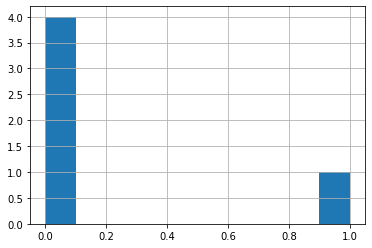

In [39]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count